# Read the Data

In [1]:
import pandas as pd
import glob

# Define the column names
columns_ae33 = [
    "Date(yyyy/MM/dd)", "Time(hh:mm:ss)", "Timebase", "RefCh1", "Sen1Ch1", "Sen2Ch1", "RefCh2",
    "Sen1Ch2", "Sen2Ch2", "RefCh3", "Sen1Ch3", "Sen2Ch3", "RefCh4", "Sen1Ch4", "Sen2Ch4", "RefCh5",
    "Sen1Ch5", "Sen2Ch5", "RefCh6", "Sen1Ch6", "Sen2Ch6", "RefCh7", "Sen1Ch7", "Sen2Ch7", "Flow1",
    "Flow2", "FlowC", "Pressure (Pa)", "Temperature (°C)", "BB (%)", "ContTemp", "SupplyTemp",
    "Status", "ContStatus", "DetectStatus", "LedStatus", "ValveStatus", "LedTemp", "BC11", "BC12", "BC1",
    "BC21", "BC22", "BC2", "BC31", "BC32", "BC3", "BC41", "BC42", "BC4", "BC51", "BC52", "BC5", "BC61",
    "BC62", "BC6", "BC71", "BC72", "BC7", "K1", "K2", "K3", "K4", "K5", "K6", "K7", "TapeAdvCount", "ID_com1", "ID_com2", "ID_com3"
]

# Find all .dat files in the folder
dat_files = glob.glob("bc_data/*.dat")

# Read and combine all files
df_list = []
for file in dat_files:
    try:
        df_temp = pd.read_csv(file, skiprows=6, delim_whitespace=True, names=columns_ae33)
        df_list.append(df_temp)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all dataframes
df = pd.concat(df_list, ignore_index=True)

# Show the combined dataframe
df

,Date(yyyy/MM/dd),Time(hh:mm:ss),Timebase,RefCh1,Sen1Ch1,Sen2Ch1,RefCh2,Sen1Ch2,Sen2Ch2,RefCh3,...,K2,K3,K4,K5,K6,K7,TapeAdvCount,ID_com1,ID_com2,ID_com3
0,2025/05/14,00:00:00,60,940653,384399,524611,942354,460196,604486,936289,...,0.007714,0.007693,0.007637,0.008321,0.008600,0.008881,691,0,5,0
1,2025/05/14,00:01:00,60,940805,366416,506069,942280,441151,585741,936216,...,0.007901,0.007867,0.007791,0.008487,0.008716,0.008994,691,0,5,0
2,2025/05/14,00:02:00,60,941067,342277,480461,942380,415434,559797,936241,...,0.008065,0.008022,0.007938,0.008641,0.008836,0.009106,691,0,5,0
3,2025/05/14,00:03:00,60,941108,322927,459313,942178,394578,538111,936078,...,0.008131,0.008087,0.008003,0.008711,0.008897,0.009158,691,0,5,0
4,2025/05/14,00:04:00,60,941329,299063,432503,942206,368646,510479,936038,...,0.008133,0.008094,0.008014,0.008715,0.008891,0.009155,691,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20537,2025/05/08,23:55:00,60,912879,365917,477520,915659,449995,574553,913249,...,0.007083,0.006961,0.006711,0.007345,0.007095,0.007368,600,0,5,0
20538,2025/05/08,23:56:00,60,912940,338759,450762,915439,420379,546201,913077,...,0.007077,0.006981,0.006766,0.007408,0.007233,0.007518,600,0,5,0
20539,2025/05/08,23:57:00,60,913166,323419,435229,915477,403522,529663,913102,...,0.007038,0.006957,0.006762,0.007406,0.007282,0.007559,600,0,5,0
20540,2025/05/08,23:58:00,60,913249,305716,416885,915375,383856,509923,912972,...,0.006975,0.006914,0.006753,0.007396,0.007339,0.007608,600,0,5,0


In [2]:
# Keep only the desired columns
df = df[["Date(yyyy/MM/dd)", "Time(hh:mm:ss)", "BC1", "BC2", "BC3", "BC4", "BC5", "BC6", "BC7", "BB (%)"]]

In [3]:
import pandas as pd
import pytz

# Step 1: Combine Date and Time into a single datetime column (string -> datetime)
df['datetime'] = pd.to_datetime(df['Date(yyyy/MM/dd)'] + ' ' + df['Time(hh:mm:ss)'])

# Step 2: Localize this datetime to US Eastern Time (assumes these times are in US ET)
us_tz = pytz.timezone('America/New_York')
df['datetime_us'] = df['datetime'].dt.tz_localize(us_tz, ambiguous='NaT', nonexistent='shift_forward')

# Step 3: Convert to Kenya time (Africa/Nairobi, UTC+3)
kenya_tz = pytz.timezone('Africa/Nairobi')
df['datetime_kenya'] = df['datetime_us'].dt.tz_convert(kenya_tz)

# Step 4 (optional): Extract date and time strings in Kenya time if needed
df['Date_kenya'] = df['datetime_kenya'].dt.strftime('%Y/%m/%d')
df['Time_kenya'] = df['datetime_kenya'].dt.strftime('%H:%M:%S')

print(df[['Date(yyyy/MM/dd)', 'Time(hh:mm:ss)', 'Date_kenya', 'Time_kenya']])

/tmp/ipykernel_134886/1202492187.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['Date(yyyy/MM/dd)'] + ' ' + df['Time(hh:mm:ss)'])
/tmp/ipykernel_134886/1202492187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_us'] = df['datetime'].dt.tz_localize(us_tz, ambiguous='NaT', nonexistent='shift_forward')
/tmp/ipykernel_134886/1202492187.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

      Date(yyyy/MM/dd) Time(hh:mm:ss)  Date_kenya Time_kenya
0           2025/05/14       00:00:00  2025/05/14   07:00:00
1           2025/05/14       00:01:00  2025/05/14   07:01:00
2           2025/05/14       00:02:00  2025/05/14   07:02:00
3           2025/05/14       00:03:00  2025/05/14   07:03:00
4           2025/05/14       00:04:00  2025/05/14   07:04:00
...                ...            ...         ...        ...
20537       2025/05/08       23:55:00  2025/05/09   06:55:00
20538       2025/05/08       23:56:00  2025/05/09   06:56:00
20539       2025/05/08       23:57:00  2025/05/09   06:57:00
20540       2025/05/08       23:58:00  2025/05/09   06:58:00
20541       2025/05/08       23:59:00  2025/05/09   06:59:00

[20542 rows x 4 columns]


/tmp/ipykernel_134886/1202492187.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_kenya'] = df['datetime_kenya'].dt.strftime('%H:%M:%S')


In [4]:
# Drop Columns
df = df.drop(columns=['Date(yyyy/MM/dd)', 'Time(hh:mm:ss)'])

In [5]:
# After you have 'Date_kenya' and 'Time_kenya' columns
df['Date(yyyy/MM/dd)'] = df['Date_kenya']
df['Time(hh:mm:ss)'] = df['Time_kenya']

# Then drop the temporary columns
df.drop(columns=['Date_kenya', 'Time_kenya'], inplace=True)

In [6]:
# Convert to datetime format
df["Date(yyyy/MM/dd)"] = pd.to_datetime(df["Date(yyyy/MM/dd)"], format="%Y/%m/%d")

# Sort by date
df = df.sort_values("Date(yyyy/MM/dd)").reset_index(drop=True)

In [7]:
# Update unit measurement for BC1-BC7
bc_cols = ['BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'BC6', 'BC7']
df[bc_cols] = df[bc_cols] / 1000

# Create Plots

In [8]:
df["datetime"] = pd.to_datetime(df["Date(yyyy/MM/dd)"].astype(str) + " " + df["Time(hh:mm:ss)"].astype(str))

In [9]:
# Convert time column to timedelta
df["time_delta"] = pd.to_timedelta(df["Time(hh:mm:ss)"])

# Add time delta to the date column (which is already datetime)
df["datetime"] = df["Date(yyyy/MM/dd)"] + df["time_delta"]

# Drop helper column if you want
df.drop(columns=["time_delta"], inplace=True)

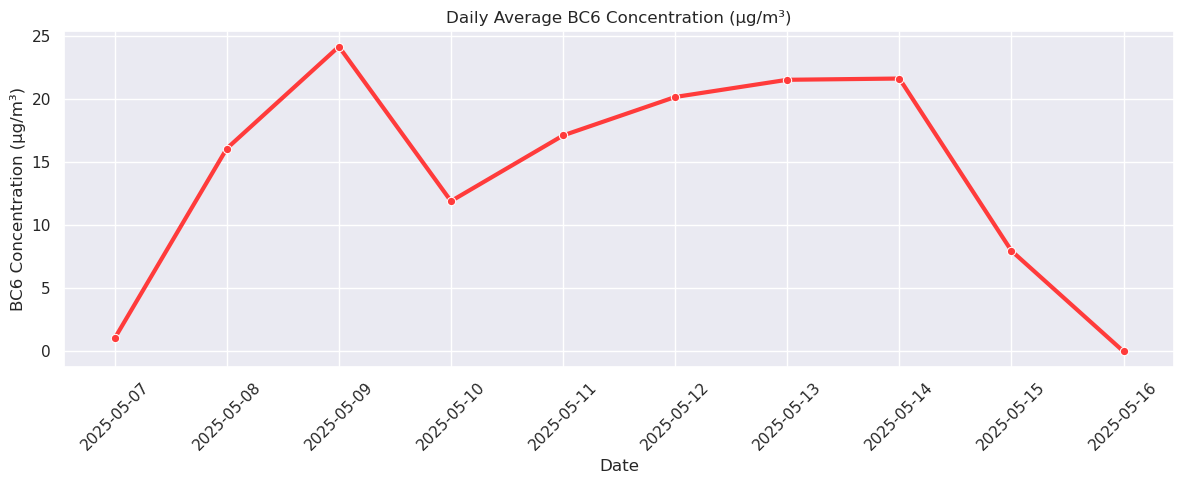

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert datetime column to datetime if it's not already
df["datetime"] = pd.to_datetime(df["datetime"])

# Resample by day and calculate mean BC6 for each day
daily_df = df.resample("D", on="datetime")["BC6"].mean().reset_index()

# Plotting with dots, custom color, and thicker line
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 5))
sns.lineplot(
    x="datetime",
    y="BC6",
    data=daily_df,
    marker="o",      
    color="#FF3B3B",  
    linewidth=3       
)
plt.title("Daily Average BC6 Concentration (µg/m³)")
plt.xlabel("Date")
plt.ylabel("BC6 Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# Extract Hour
df["hour"] = df["datetime"].dt.hour
# Calculate Hourly Average
hourly_avg = df.groupby("hour")["BC6"].mean().reset_index()

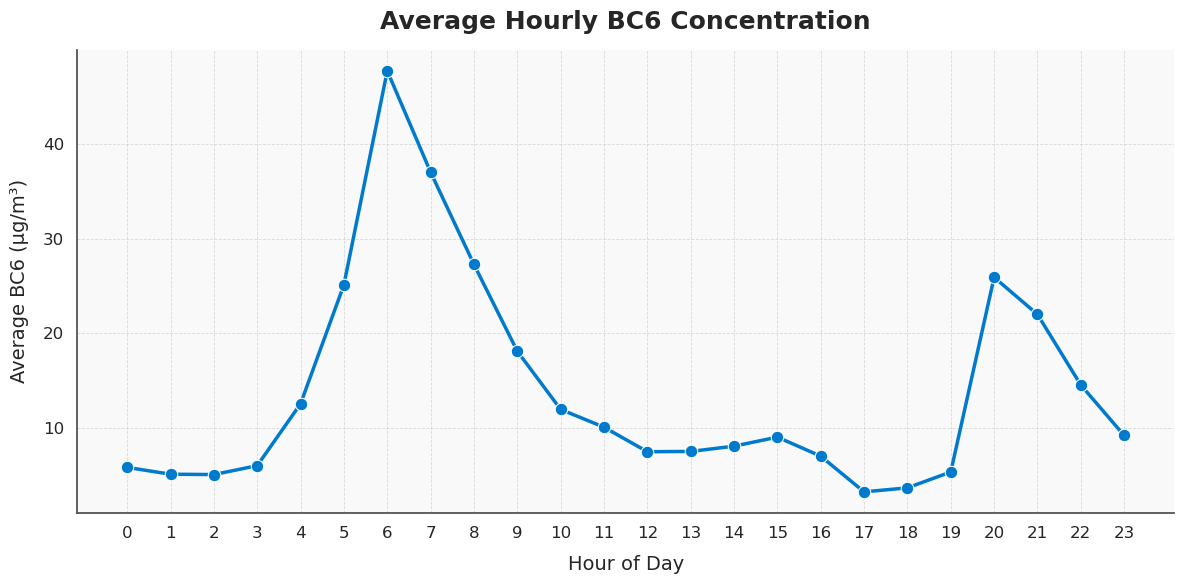

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and palette
sns.set_style("whitegrid")
plt.rcParams["axes.edgecolor"] = "0.3"

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Plot 
sns.lineplot(
    x="hour", 
    y="BC6", 
    data=hourly_avg, 
    marker="o", 
    markersize=9, 
    color="#007acc", 
    linewidth=2.5, 
    linestyle="-"
)

# Enhance the look
ax.set_facecolor("#f9f9f9")
ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)

# Remove top/right spines
sns.despine()

# Title & labels
plt.title("Average Hourly BC6 Concentration", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Hour of Day", fontsize=14, labelpad=10)
plt.ylabel("Average BC6 (µg/m³)", fontsize=14, labelpad=10)
plt.xticks(range(0, 24), fontsize=12)
plt.yticks(fontsize=12)

# Final layout
plt.tight_layout()
plt.show()

In [13]:
# Create a New Column
df["wood_combustion_indicator"] = df["BC1"] - df["BC6"]

In [14]:
# Calculate Hourly Average
hourly_avg = df.groupby("hour")["wood_combustion_indicator"].mean().reset_index()

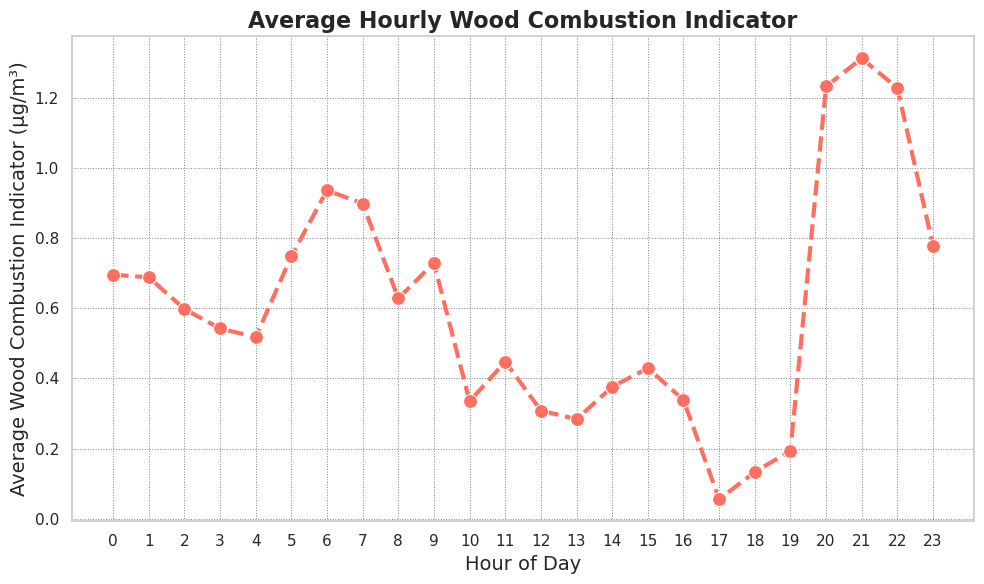

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set theme with white background and grid
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

# Customize color and line style
sns.lineplot(
    x="hour", 
    y="wood_combustion_indicator", 
    data=hourly_avg, 
    marker="o", 
    color="#FF6F61",    
    linestyle="--",      
    linewidth=3,
    markersize=10
)

plt.title("Average Hourly Wood Combustion Indicator", fontsize=16, weight="bold")
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Average Wood Combustion Indicator (µg/m³)", fontsize=14)
plt.xticks(range(0, 24)) 
plt.grid(True, linestyle=":", linewidth=0.7, color="gray")  # dotted grid lines
plt.tight_layout()
plt.show()

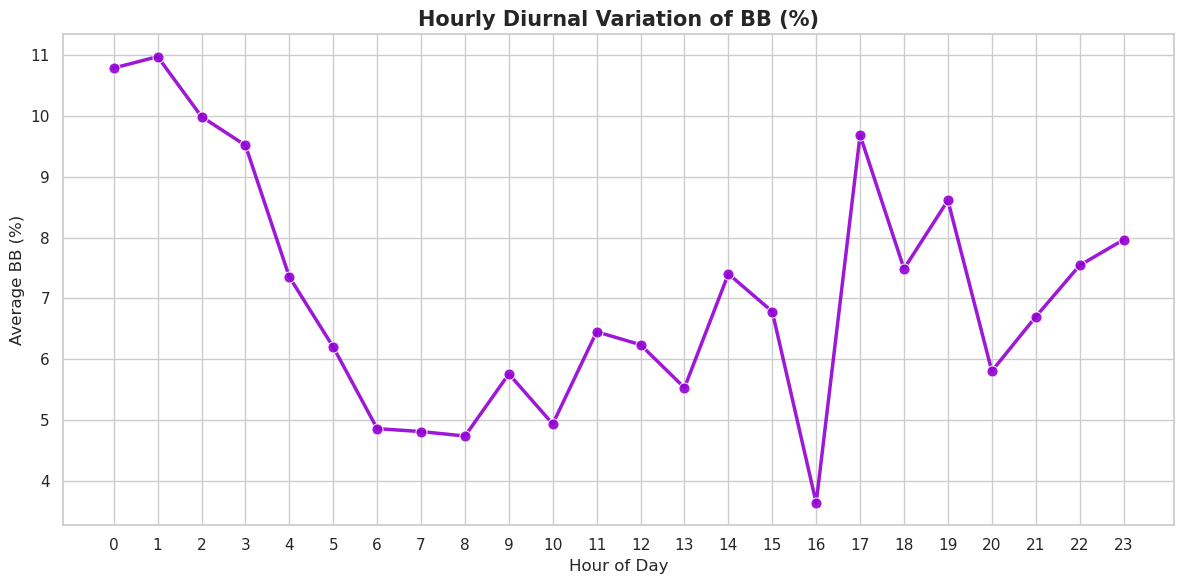

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure datetime is in datetime format
df["datetime"] = pd.to_datetime(df["datetime"])

# Extract hour from datetime
df["hour"] = df["datetime"].dt.hour

# Calculate hourly average BB (%)
hourly_bb = df.groupby("hour")["BB (%)"].mean().reset_index()

# Set Seaborn theme
sns.set_theme(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="hour",
    y="BB (%)",
    data=hourly_bb,
    marker="o",
    linewidth=2.5,
    color="darkviolet",
    markersize=8,
    alpha=0.9
)

# Styling
plt.title("Hourly Diurnal Variation of BB (%)", fontsize=15, weight='bold')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average BB (%)", fontsize=12)
plt.xticks(range(0, 24))  # Show all 24 hours
plt.grid(True)
plt.tight_layout()
plt.show()